In [114]:
import pandas as pd
import numpy as np
import glob
import re

In [128]:
#Names to WB names
any_to_wb = pd.read_csv("inputs/any_name_to_wb_name.csv",index_col="any",squeeze=True)

#GAR names with SIDS spec
gar_name_sids = pd.read_csv("inputs/gar_name_sids.csv")

#iso3 to wb country name table
iso3_to_wb=pd.read_csv("inputs/iso3_to_wb_name.csv").set_index("iso3").squeeze()

#iso2 to iso3 table
iso2_iso3 = pd.read_csv("inputs/names_to_iso.csv", usecols=["iso2","iso3"]).drop_duplicates().set_index("iso2").squeeze() #the tables has more lines than countries to account for several ways of writing country names

In [157]:
path ='inputs\\IOtables\\'

In [236]:
T_labels = pd.read_table(path+"labels_T.txt",header=None)
FD_labels = pd.read_table(path+"labels_FD.txt",header=None)

In [246]:
T = pd.read_table(path+"Eora26_2013_bp_T.txt", header=None)

In [237]:
FD = pd.read_table(path+"Eora26_2013_bp_FD.txt", header=None)

In [260]:
df = pd.DataFrame(columns = ["share_transport","share_water_energy","share_construction","share_ict"])
for iso3 in FD_labels[1].unique():
    if iso3=='ROW':
        continue
    fd_c = FD.ix[T_labels[1]==iso3,:].sum(axis=1)
    fd_c.index = T_labels.ix[T_labels[1]==iso3,3]
    t_c = T.ix[T_labels[1]==iso3,:].sum(axis=1)
    t_c.index = T_labels.ix[T_labels[1]==iso3,3]
    Y = fd_c+t_c
    df.loc[iso3,"share_transport"]    = Y.loc[["Transport","Transport Equipment"]].sum()/Y.sum()
    df.loc[iso3,"share_water_energy"] = Y.loc[["Electricity, Gas and Water"]].sum()/Y.sum()
    df.loc[iso3,"share_construction"] = Y.loc[["Construction"]].sum()/Y.sum()
    df.loc[iso3,"share_ict"]          = Y.loc[["Post and Telecommunications"]].sum()/Y.sum()

In [271]:
df.reset_index()

,index,share_transport,share_water_energy,share_construction,share_ict
0,AFG,0.0688818,0.0171805,0.0592875,0.0450094
1,ALB,0.0772592,0.0237535,0.139462,0.0327445
2,DZA,0.065531,0.0213828,0.0678744,0.031728
3,AND,0.0677521,0.0185292,0.0677448,0.0350387
4,AGO,0.0641123,0.0204289,0.0559231,0.0355383
5,ATG,0.0903724,0.023626,0.0720292,0.0434637
6,ARG,0.0764229,0.0218239,0.060927,0.0224251
7,ARM,0.0586912,0.0388685,0.13802,0.0355217
8,ABW,0.0608441,0.0469126,0.0744917,0.0347145
9,AUS,0.0734245,0.0148409,0.0820834,0.028736


In [278]:
df = df.reset_index()
df['country'] = df["index"].replace(iso3_to_wb)

In [280]:
df=df.set_index("country")

In [281]:
df.sample(10)

,index,share_transport,share_water_energy,share_construction,share_ict
country,,,,,
"Congo, Dem. Rep.",COD,0.0691753,0.0229322,0.0597422,0.038998
United Arab Emirates,ARE,0.0718654,0.0205334,0.0896184,0.03862
Czech Republic,CZE,0.121345,0.0430297,0.0791859,0.016708
Turkmenistan,TKM,0.0706457,0.0134701,0.0637693,0.0373644
South Africa,ZAF,0.0947337,0.0236619,0.0511268,0.0323731
"Egypt, Arab Rep.",EGY,0.0600965,0.0222879,0.0546864,0.034958
Nepal,NPL,0.0722917,0.0204556,0.0540671,0.0375227
Portugal,PRT,0.063768,0.027661,0.101293,0.0269403
Austria,AUT,0.0857071,0.0230601,0.0730057,0.0209704


In [285]:
df.drop("index",axis=1).to_csv("inputs\\share_infra_from_eora.csv")

In [263]:
gar_name_sids['wbcountry'] = gar_name_sids.reset_index().country.replace(any_to_wb)
gar_name_sids['iso3'] = gar_name_sids.reset_index().wbcountry.replace(any_to_wb)
list_of_sids = gar_name_sids[gar_name_sids.isaSID=="SIDS"].dropna().reset_index().wbcountry

In [283]:
df.loc[list_of_sids,:].dropna()

,index,share_transport,share_water_energy,share_construction,share_ict
country,,,,,
Antigua and Barbuda,ATG,0.0903724,0.023626,0.0720292,0.0434637
Aruba,ABW,0.0608441,0.0469126,0.0744917,0.0347145
"Bahamas, The",BHS,0.0572664,0.0434269,0.0694743,0.035669
Bahrain,BHR,0.0761213,0.0209019,0.0990013,0.0356685
Barbados,BRB,0.0877309,0.0199211,0.0605882,0.0369631
Belize,BLZ,0.0838662,0.0214033,0.0628885,0.0395878
Bermuda,BMU,0.0510574,0.0236293,0.0688416,0.0358498
"Virgin Islands, British",VGB,0.0769176,0.0191544,0.0658388,0.0451391
Cape Verde,CPV,0.0791564,0.0217505,0.0737197,0.0509147


In [287]:
import matplotlib.pylab as plt
%matplotlib inline
import seaborn

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


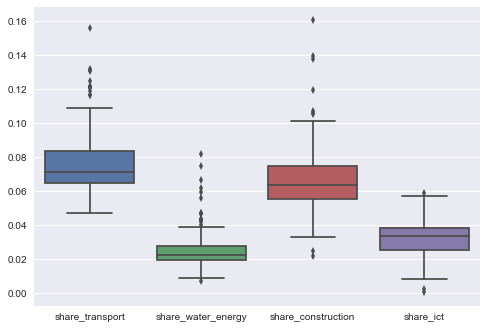

In [289]:
seaborn.boxplot(df)

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


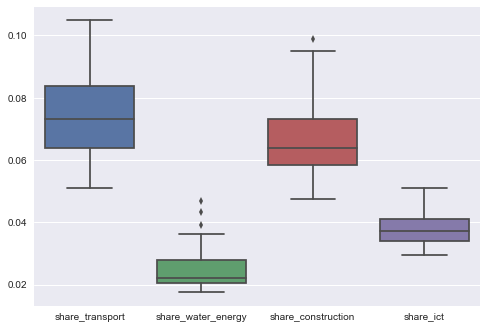

In [290]:
seaborn.boxplot(df.loc[list_of_sids,:].dropna())


In [135]:
path ='inputs\\IOtables'
allFiles = glob.glob(path + "/*.tab")

In [137]:
countries_with_io = [s.split("_")[1] for s in allFiles]

In [141]:
iso3_to_wb[countries_with_io].drop_duplicates().count()

185

In [151]:
df = pd.DataFrame(columns = ["share_transport","share_water_energy","share_construction","share_ict"])

for file in allFiles:
    tt = pd.read_table(file,low_memory=False)
    iso3 = file.split("_")[1]

    d = tt.ix[tt["Unnamed: 2"]=="Industries",(tt.loc[1,:]=="Final Demand")|(tt.loc[1,:]=="ExportsTo")].astype(float).sum(axis=1)
    d.index = tt.ix[tt["Unnamed: 2"]=="Industries","Unnamed: 3"]

    X = tt.ix[tt["Unnamed: 2"]=="Industries",tt.loc[1,:]=="Industries"].astype(float)
    X.columns = tt.ix[2,tt.loc[1,:]=="Industries"]
    X.index = tt.ix[tt["Unnamed: 2"]=="Industries","Unnamed: 3"]
    
    Y = X.sum(axis=1)+d
    
    if Y.sum()==0:
        continue
    
    df.loc[iso3,"share_transport"]    = Y.loc[["Transport","Transport Equipment"]].sum()/Y.sum()
    df.loc[iso3,"share_water_energy"] = Y.loc[["Electricity, Gas and Water"]].sum()/Y.sum()
    df.loc[iso3,"share_construction"] = Y.loc[["Construction"]].sum()/Y.sum()
    df.loc[iso3,"share_ict"]          = Y.loc[["Post and Telecommunications"]].sum()/Y.sum()
    

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255

KeyError: "None of [['Transport', 'Transport Equipment']] are in the [index]"

In [152]:
iso3

'ARG'

In [153]:
Y

Unnamed: 3
Cereals, oilseeds and forage                                                   12836190.00
Growing of vegetables, legumes, flowers and ornamental plants                        10.00
Growing fruits and nuts                                                              10.00
Industrial crops                                                                     10.00
Seed production                                                                  842855.90
Livestock and milk production, wool and hair                                         10.00
Farm Production                                                                      10.00
Agricultural services                                                           1132576.00
Hunting                                                                              10.00
Forestry and logging                                                             113462.50
Fishing                                                                        